# Центральная предельная теорема своими руками

### Проверим работу теоремы на примере экспоненциального распределения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math
%matplotlib inline

Подготовим данные

In [2]:
"""Начальные данные"""

# параметр лямбда экспоненциального распределения
l = 0.6
# мат. ожидание
mx = 1/l
# дисперсия
Dx = 1/(l ** 2)
#ссылка на инстанцию экспоненциального распределения с параметром лямбда
expon_rv = sts.expon(l)

Text(0.5, 1.0, 'Гистограмма и плотность распределения')

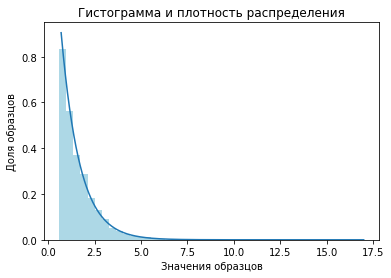

In [3]:
"""Построение гистограммы выборки и теоретической плотности распределения вероятностей"""

# сгенерируем выборку объёма 1000
expon_sample = expon_rv.rvs(1000)

# визуализация
fig, ax = plt.subplots()
x = np.linspace(0.7,17,1000)
pdf_expon = expon_rv.pdf(x)
ax.hist(expon_sample, bins=20,density=True, color='lightblue')
ax.plot(x, pdf_expon)
ax.set_xlabel('Значения образцов')
ax.set_ylabel('Доля образцов')
plt.title('Гистограмма и плотность распределения')

Сгенерируем 1000 выборок разных объёмов

In [4]:
"""Генерация выборок разных объёмов"""

# тут будут выборки
sampleList = []
# объёмы выборок
n = [3,5,10,50,100]
for i in n:
    # добавляем выборки в лист с выборками
    sampleList.append(np.random.choice(expon_sample,(1000,i)))
for i in range(len(sampleList)):
    print('Тысяча выборок объёма n =',n[i],sampleList[i])

Тысяча выборок объёма n = 3 [[1.85816063 0.64796596 2.9216873 ]
 [1.29241095 1.4003686  1.02601005]
 [0.82447842 4.43329015 2.19413549]
 ...
 [4.26178364 1.83522025 0.86116427]
 [1.99310815 0.67610895 1.86379936]
 [2.57244557 1.78251751 1.09234958]]
Тысяча выборок объёма n = 5 [[1.18116337 0.69781094 2.13768595 1.54876061 1.29816253]
 [1.42921028 2.85730245 3.95033982 2.16042731 1.30317065]
 [2.50783733 1.55132098 1.0674491  1.53120272 1.42398567]
 ...
 [0.91461169 1.67885246 0.85609896 2.94786737 2.67262857]
 [0.73655803 1.42921028 1.17318534 2.30159326 2.25794522]
 [1.0952332  0.75744841 1.57804427 1.35178693 2.12689181]]
Тысяча выборок объёма n = 10 [[0.63912235 0.76611338 1.60414843 ... 0.66110516 1.26556392 1.78608242]
 [6.80057053 1.45593196 0.64970427 ... 0.90765523 2.60435997 0.90116558]
 [1.24895353 1.2817365  2.58221475 ... 0.74765318 0.64237301 3.95033982]
 ...
 [3.42297218 0.63953028 1.11588689 ... 1.11511373 3.37263169 1.77670214]
 [1.00077049 2.40205217 0.83674962 ... 1.0

Построим гистограммы распределений их выборочных средних

In [5]:
def sampleMean(list_of_samples):
    """Функция подсчёта выборочных средних"""
    list_of_means = []
    for sampleItem in list_of_samples:
        xsr, s = 0, 0
        for i in range(len(sampleItem)):
            s += sampleItem[i]
        xsr = s/len(sampleItem)
        list_of_means.append(xsr)  
    return list_of_means

* __n = 3__

Text(0.5, 1.0, 'Гистограмма и плотность распределения')

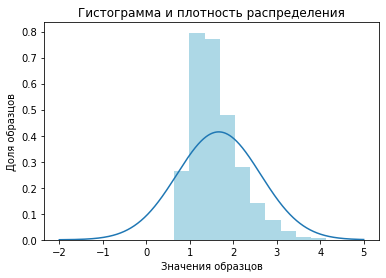

In [6]:
"""Визуализируем среднее для объёма 3"""

#выборка выб. средних для выборок объёма 3
xsrList3 = sampleMean(sampleList[0])

# зададим нормально распределенную случайную величину, используя теор. среднее и дисперсию исходного распределения
norm_rv3 = sts.norm(mx, math.sqrt(Dx/3))

# визуализация
fig, ax = plt.subplots()
x3 = np.linspace(-2,5,1000)
pdf3 = norm_rv3.pdf(x3)
# строим гистограмму распределения
ax.hist(xsrList3, density=True, color='lightblue')
# строим плотность распределения
ax.plot(x3,pdf3)
ax.set_xlabel('Значения образцов')
ax.set_ylabel('Доля образцов')
plt.title('Гистограмма и плотность распределения')

* __n = 5__

Text(0.5, 1.0, 'Гистограмма и плотность распределения')

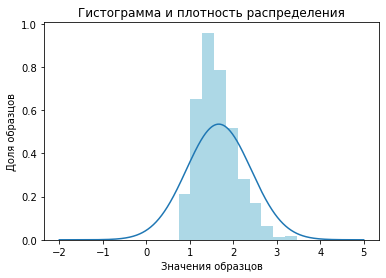

In [7]:
"""Визуализируем среднее для объёма 5"""

#выборка выб. средних для выборок объёма 5
xsrList5 = sampleMean(sampleList[1])

# зададим нормально распределенную случайную величину, используя теор. среднее и дисперсию исходного распределения
norm_rv5 = sts.norm(mx, math.sqrt(Dx/5))

# визуализация
fig, ax = plt.subplots()
x5 = np.linspace(-2,5,1000)
pdf5 = norm_rv5.pdf(x5)
# строим гистограмму распределения
ax.hist(xsrList5, density=True, color='lightblue')
# строим плотность распределения
ax.plot(x5, pdf5)
ax.set_xlabel('Значения образцов')
ax.set_ylabel('Доля образцов')
plt.title('Гистограмма и плотность распределения')

* __n = 10__

Text(0.5, 1.0, 'Гистограмма и плотность распределения')

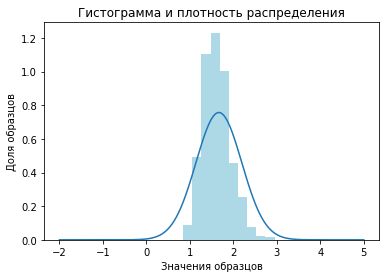

In [8]:
"""Визуализируем среднее для объёма 10"""

#выборка выб. средних для выборок объёма 10
xsrList10 = sampleMean(sampleList[2])

# зададим нормально распределенную случайную величину, используя теор. среднее и дисперсию исходного распределения
norm_rv10 = sts.norm(mx, math.sqrt(Dx/10))

# визуализация
fig, ax = plt.subplots()
x10 = np.linspace(-2,5,1000)
pdf10 = norm_rv10.pdf(x10)
# строим гистограмму распределения
ax.hist(xsrList10, density=True, color='lightblue')
# строим плотность распределения
ax.plot(x10, pdf10)
ax.set_xlabel('Значения образцов')
ax.set_ylabel('Доля образцов')
plt.title('Гистограмма и плотность распределения')

* __n = 50__

Text(0.5, 1.0, 'Гистограмма и плотность распределения')

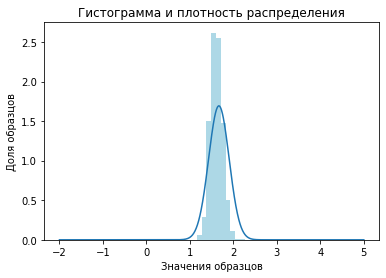

In [9]:
"""Визуализируем среднее для объёма 50"""

#выборка выб. средних для выборок объёма 50
xsrList50 = sampleMean(sampleList[3])

# зададим нормально распределенную случайную величину, используя теор. среднее и дисперсию исходного распределения
norm_rv50 = sts.norm(mx, math.sqrt(Dx/50))

# визуализация
fig, ax = plt.subplots()
x50 = np.linspace(-2,5,1000)
pdf50 = norm_rv50.pdf(x50)
# строим гистограмму распределения
ax.hist(xsrList50, density=True, color='lightblue')
# строим плотность распределения
ax.plot(x50, pdf50)
ax.set_xlabel('Значения образцов')
ax.set_ylabel('Доля образцов')
plt.title('Гистограмма и плотность распределения')

<span style="color:red;font-weight:bold;font-size:16px">*Вывод*:</span>
<span style="color:red;font-size:16px">*видим, что с увеличением числа n (объёма выборок) кривая нормального распределения выборочных средних равно, как и гистограмма, становятся более узкими. Точность аппроксимации при этом увеличивается (сравни, например, гистограмму и плотность при n=3 и n=50). Это связано с тем, что выборочное среднее выборок стремится к среднему генеральной совокупности распределения.*</span>